In [20]:
%matplotlib inline
from pylab import *
import numpy as np
import seaborn as sns
import pandas as pd

np.random.seed(2)
#For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between
#page speed (how fast each web page renders for a customer) and how much a customer spends.

#First, let's just make page speed and purchase amount totally random
#generating normally distrubuted random data

#Normally distributed dat with mean 3 i.e data centered arround 3 with standard deviation 1 and 
#total 1000 data point
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
#Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation.
#making purchaseAmount function of pageSpeed
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

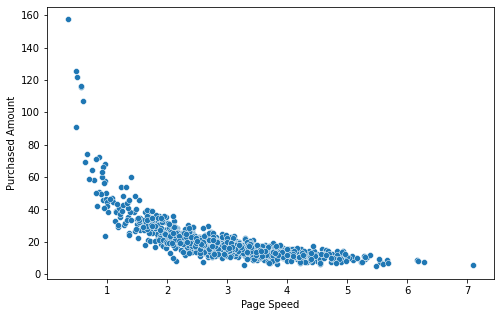

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=pageSpeeds,y=purchaseAmount)
plt.xlabel('Page Speed') #x label
plt.ylabel('Purchased Amount') #y label
plt.show()

In [33]:
#Evert=y thing before 80 i.e 80%
trainX = pageSpeeds[:80]
#everything afer 80% ie. 20%
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]


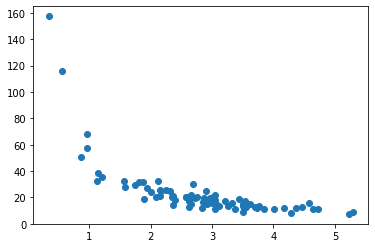

In [34]:
scatter(trainX,trainY)

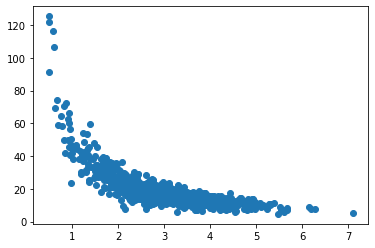

In [35]:
scatter(testX,testY)

In [48]:
#numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model 
#of our data that minimizes squared error.
#Let's try it with a 8th degree polynomial:

#x, y axis is array of pageSpeed and Purchase Amount on TRAINING DATA
x = np.array(trainX)
y = np.array(trainY)

#np.polyfit(x,y,8) -> we want 8th Degree of Polynomial Fit to this data

#The polynomial’s coefficients, in decreasing powers,
#For example, poly1d([1, 2, 3]) returns an object that represents Xsqure2+2X+1
p4=np.poly1d(np.polyfit(x,y,5))

#p4 funcation help to Predict new value

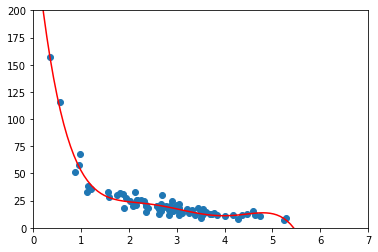

In [49]:
#We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial 
#for page speed times ranging from 0-7 seconds:

import matplotlib.pyplot as plt

#100 data point between 0-7 sec
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
#P4(xp) -> Predicted Y value for each xp value
#plotting x and y [x=xp] and [y=p4(xp)]
plt.plot(xp, p4(xp), c='r')
plt.show()


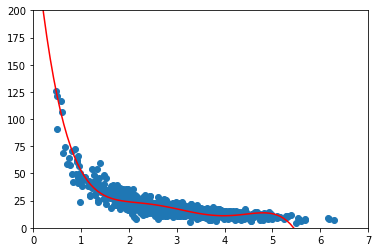

In [50]:
#We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial 
#for page speed times ranging from 0-7 seconds:

import matplotlib.pyplot as plt

#x, y axis is array of pageSpeed and Purchase Amount on TRAINING DATA
testx = np.array(testX)
testy = np.array(testY)

#100 data point between 0-7 sec
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
#P4(xp) -> Predicted Y value for each xp value
#plotting x and y [x=xp] and [y=p4(xp)]
plt.plot(xp, p4(xp), c='r')
plt.show()



In [51]:
from sklearn.metrics import r2_score
r2=r2_score(testY,p4(testX))
r2

-2.801401762847181

In [52]:
from sklearn.metrics import r2_score

r2 = r2_score(trainY, p4(trainX))

print(r2)

0.9584754747722157
